#### Author: Jens Liebehenschel (2021)
#### Frankfurt University of Applied Sciences, FB2, Computer Science
#### For educational purposes only and not necessarily very pythonic
## Sorting an array using quicksort and visualize the single steps
#### Based on Cormen et. al.: Introduction to Algorithms
## For execution of complete code click on "Kernel", then on "Restart & Run All"
## At the end of your experiments click on "File", then on "Close and Halt"

In [1]:
# main function to be called for sorting the complete array
def sort(a):
    global steps, index_last_complete_step
    steps=[]
    index_last_complete_step=0

    # the pivot element is stored in an additional element at the end of the array (a[ARRAY_SIZE])
    # rationale: improve understandability of pivot comparisons and assignments in output
    a.append(-1)

    # nothing yet sorted
    steps.append([[UNSORTED]*ARRAY_SIZE, [], [], a[:]])

    return quicksort(a, 0, ARRAY_SIZE-1)[:-1] # do not include additional space for pivot in returned array, so remove last element

In [2]:
def quicksort(a, p, r):
    global steps, index_last_complete_step
    if p < r:
        q = partition(a, p, r)
        new_state = steps[index_last_complete_step][0][:p] +\
                    [PART_SORTED]*((q-1)-p+1) + [SORTED] + [PART_SORTED]*(r-(q+1)+1) +\
                    steps[index_last_complete_step][0][r+1:]
        step = [new_state, [], [], a[:]]
        index_last_complete_step = len(steps)
        steps.append(step)
        
        quicksort(a, p, q-1)
        # store state only if it has changed compared to previous one or duplicate states shall be output
        if steps[index_last_complete_step][0][p:q] != [SORTED]*((q-1)-p+1) or output_duplicate_states:
            new_state = steps[index_last_complete_step][0][:p] +\
                        [SORTED]*((q-1)-p+1) + steps[index_last_complete_step][0][q:]
            step = [new_state, [], [], a[:]]
            index_last_complete_step = len(steps)
            steps.append(step)
        
        quicksort(a, q+1, r)
        # store state only if it has changed compared to previous one or duplicate states shall be output
        if steps[index_last_complete_step][0][q+1:r+1] != [SORTED]*(r-(q+1)+1) or output_duplicate_states:
            new_state = steps[index_last_complete_step][0][:q+1] +\
                        [SORTED]*(r-(q+1)+1) + steps[index_last_complete_step][0][r+1:]
            step = [new_state, [], [], a[:]]
            index_last_complete_step = len(steps)
            steps.append(step)

    return a

In [3]:
def partition(a, p, r):
    global steps
    # pivot element is the element at right side of part to be sorted
    a[ARRAY_SIZE] = a[r]
    i = p-1
    for j in range(p, r):
        steps.append([[], [j,ARRAY_SIZE], [], a[:]])
        if a[j] <= a[ARRAY_SIZE]:
            i = i+1
            a[i], a[j] = a[j], a[i]
            steps.append([[], [], [i,j], a[:]])
    a[i+1], a[r] = a[r], a[i+1]
    steps.append([[], [], [i+1,r], a[:]])
    # return position of pivot element
    return i+1

## Constants

In [4]:
# change output colors here
COL_SORTED = 'mediumseagreen'
COL_PART_SORTED = 'yellowgreen'
COL_UNSORTED = 'tomato'
COL_COMPARISON = 'skyblue'
COL_ASSIGNMENT = 'sandybrown'
COL_SEP_GRAPH = 'bo-' # includes also style
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"

## Helper functions for output graphical view

In [5]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=14)

def plot_states(x, states, a):
    # colors
    for y in range(ARRAY_SIZE):
        plt.plot([x,x],[y-OFFSET, y+OFFSET], COLORS[states[y]][0], linewidth=8, solid_capstyle="butt")
    # values
    plot_values(x, range(ARRAY_SIZE), a)

def plot_elements(x, y_vals, col, a):
    # colors
    minimum = min(y_vals)
    maximum = max(y_vals)
    # elements
    plot_interval(x, [minimum, minimum], col)
    plot_interval(x, [maximum, maximum], col)
    # line between both elements
    if maximum-minimum > 1:
        plot_interval(x, [minimum+1, maximum-1], col, thick_lines = False)
    # values
    plot_values(x, [minimum,maximum], a)

def plot_interval(x, y_vals, col, thick_lines = True):
    if thick_lines:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col, linewidth=8, solid_capstyle="butt")
    else:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col)

## Output graphical view

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=14)
    plt.yticks(range(0, ARRAY_SIZE+1, max(1,ARRAY_SIZE//10)), fontsize=14)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE+1])
    #plt.axis('off')
    plt.xlabel("Sorting steps")
    plt.ylabel("Indexes of array to be sorted")

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[0]) > 0:
            plot_states(i, step[0], step[3])
        elif output_compared_elements and len(step[1]) > 0:
            plot_elements(i, step[1], COL_COMPARISON, step[3])
        elif output_assigned_elements and len(step[2]) > 0:
            plot_elements(i, step[2], COL_ASSIGNMENT, step[3])

    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    plt.hlines(xmin=-1, xmax=len(steps), y=ARRAY_SIZE-OFFSET, color=COL_LAST_HORIZ_LINE)
   
    # show plot
    plt.show()

## Global variables for easier information exchange between sorting and output functions

In [7]:
# steps contains the data for visualization of the single steps
# steps: [[states], [compared elements], [assigned elements], [array]]
# [states] state for each position is one of [sorted, partially sorted, unsorted]
# [compared elements]: two indexes in a list
# [exchanged elements]: one (key assignment) or two indexes (key exchange) in a list
# [array]: copy of array in current state
steps = []
# states for each position in array, indexes must fit to ordering in COLORS
UNSORTED = 2
PART_SORTED = 1
SORTED = 0
# used as base for the next step showing the states
index_last_complete_step = 0

## Configuration data for elements in output 

In [8]:
# change output settings here
output_compared_elements = False
output_compared_elements = True
output_assigned_elements = False
output_assigned_elements = True
output_duplicate_states = False
#output_duplicate_states = True

## Size of predefined sorting tests

In [9]:
# The size of elements in tests can be changed here
ARRAY_SIZE = 10

## Legend for output

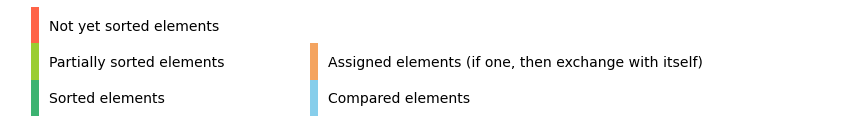

In [10]:
COLORS = [[COL_SORTED,"Sorted elements"], [COL_PART_SORTED,"Partially sorted elements"], [COL_UNSORTED,"Not yet sorted elements"],
          [COL_COMPARISON,"Compared elements"], [COL_ASSIGNMENT,"Assigned elements (if one, then exchange with itself)"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(3):
    plot_interval(1, [i+OFFSET,i+OFFSET], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
for i in range(2):
    plot_interval(11, [i+OFFSET,i+OFFSET], COLORS[i+3][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+3][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.show()

## Generate test data and test sorting algorithm

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


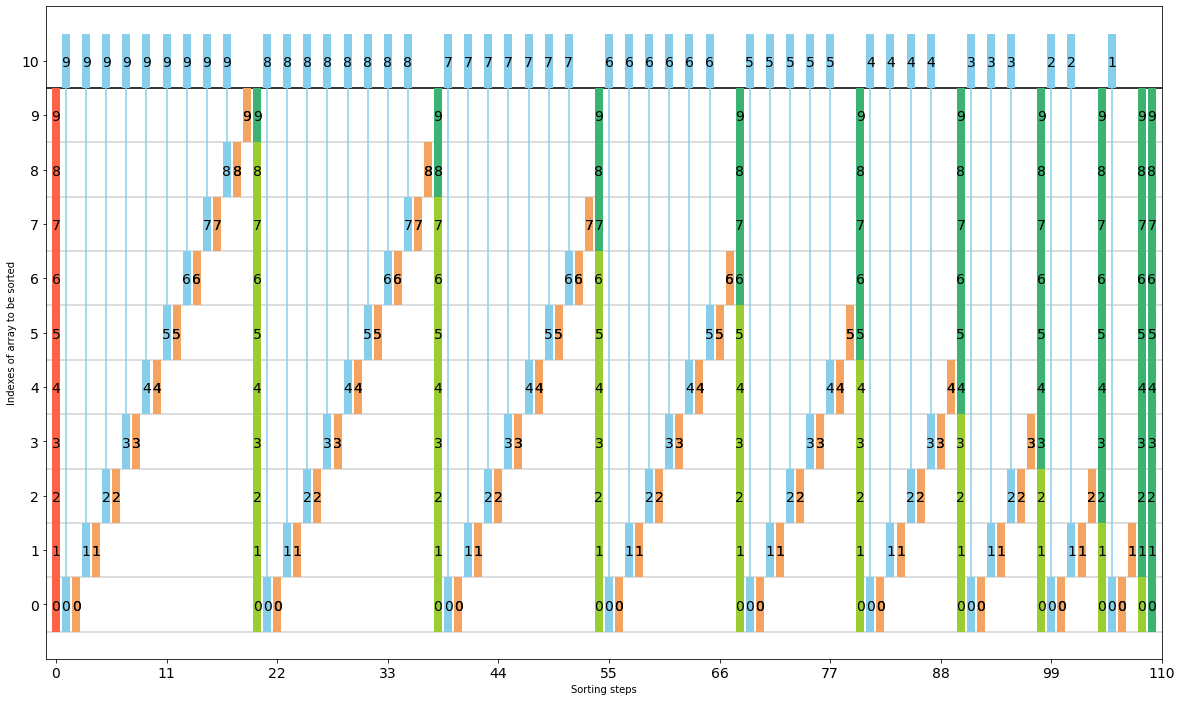

In [11]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, sort(sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


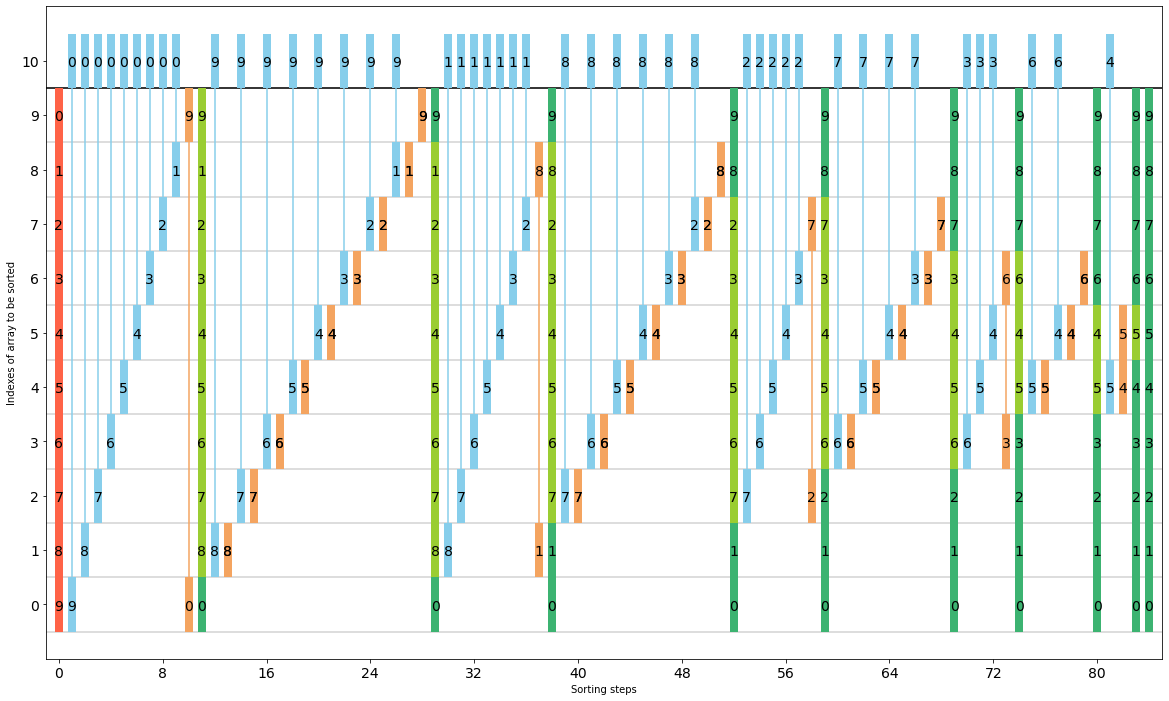

In [12]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, sort(reverse_sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


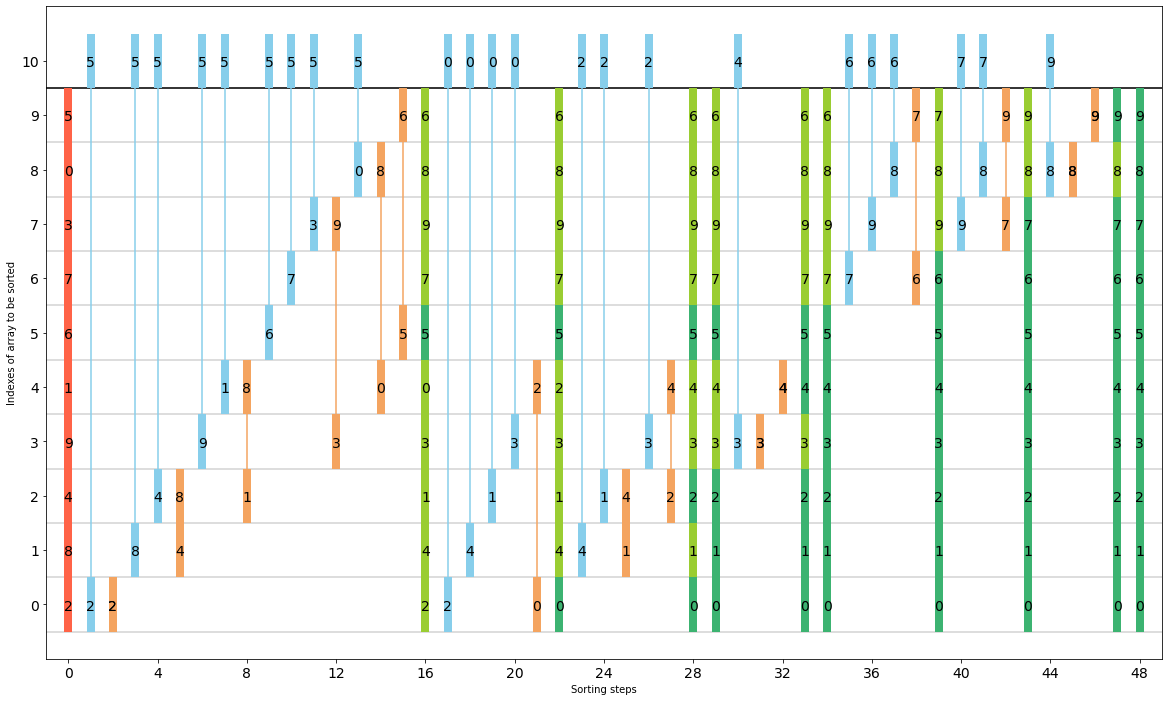

In [13]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [2, 4, 0, 1, 3]
After  sorting: [0, 1, 2, 3, 4]


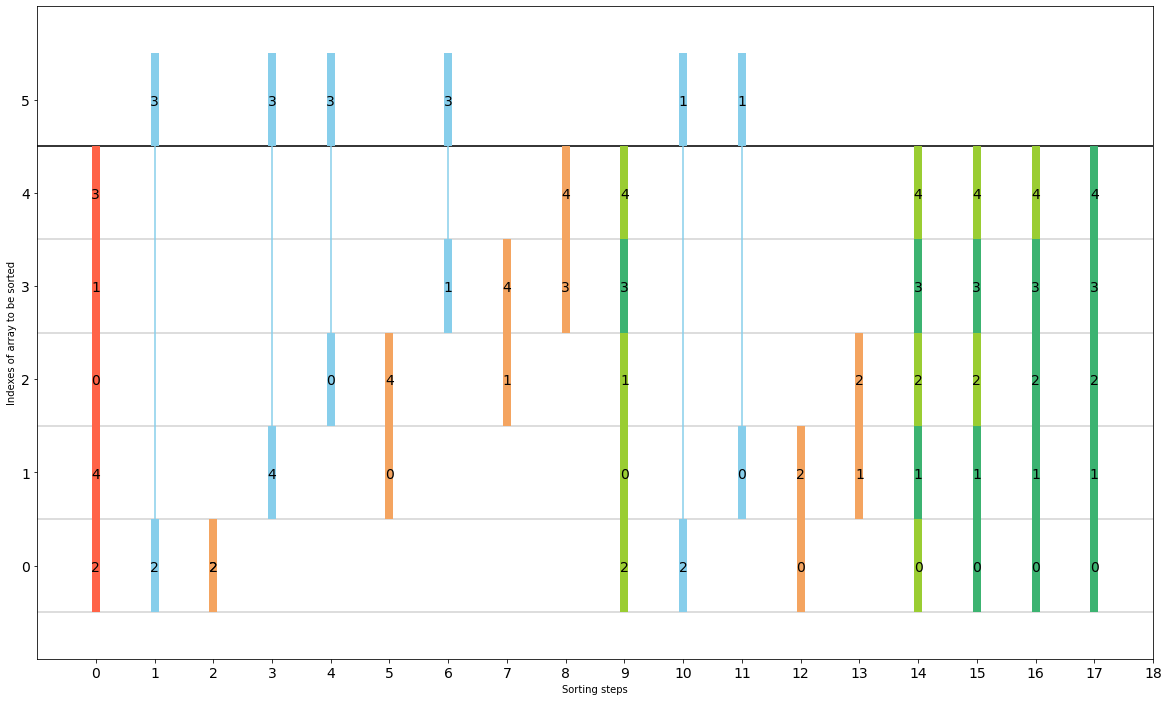

In [14]:
# your test here ...
array = [2,4,0,1,3]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array))
output_graphical_view(ARRAY_SIZE)

In [15]:
# ... and here ...
